<a href="https://colab.research.google.com/github/isabela2423/taller-1/blob/main/Taller_3_Sebastian_Alfaro_e_Isabela_Hern%C3%A1ndez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --quiet yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from scipy import stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.api as sm
import seaborn as sb

TALLER 3 
JUAN SEBASTIAN ALFARO 
ISABELA HERNANDEZ

1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022:

a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un
DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades,
betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.

b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del
CAPM y las betas de los activos.

c. Punto opcional: estime los retornos de los cinco activos usando el modelo de Fama-
French. Compare los resultados con el modelo CAPM.



In [ ]:
indice = yf.download(["^DJI"], start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
r_indice = np.log(indice/indice.shift()).dropna()
precios1 = yf.download("CAT", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos1 = np.log(precios1/precios1.shift()).dropna()
precios2 = yf.download("GS", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos2 = np.log(precios2/precios2.shift()).dropna()
precios3 = yf.download("INTC", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos3 = np.log(precios3/precios3.shift()).dropna()
precios4 = yf.download("PG", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos4 = np.log(precios4/precios4.shift()).dropna()
precios5 = yf.download("CRM", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos5 = np.log(precios5/precios5.shift()).dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#CAT
X = r_indice
Y = retornos1
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     57.11
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           3.39e-10
Time:                        04:32:17   Log-Likelihood:                 80.284
No. Observations:                  60   AIC:                            -156.6
Df Residuals:                      58   BIC:                            -152.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.008      0.388      0.6

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos1)
beta, intercept, r**2, p, std_err**2

(1.1849487598489055,
 0.0032481737091100554,
 0.4961348132816706,
 3.393107188994718e-10,
 0.02458588233372333)

In [ ]:
rCAT = retornos1.mean()
vCAT = retornos1.std()
bCAT = 1.184*r_indice.mean()
aCAT = 1.184
r2_CAT = 0.4961

In [ ]:
#GOLDMAN SACH
X = r_indice
Y = retornos2
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())
     

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.95e-16
Time:                        04:32:20   Log-Likelihood:                 93.013
No. Observations:                  60   AIC:                            -182.0
Df Residuals:                      58   BIC:                            -177.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.007     -0.049      0.9

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos2)
beta, intercept, r**2, p, std_err**2

(1.4307690970804496,
 -0.0003318607072019999,
 0.6869425322435652,
 2.9495212043915197e-16,
 0.016084766860923368)

In [ ]:
rGS = retornos2.mean()
vGS = retornos2.std()
bGS = 1.430*r_indice.mean()
aGS = 1.430
r2_GS = 0.6869

In [ ]:
#INTEL CORP
X = r_indice
Y = retornos3
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())
     

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     23.73
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           8.95e-06
Time:                        04:32:36   Log-Likelihood:                 75.039
No. Observations:                  60   AIC:                            -146.1
Df Residuals:                      58   BIC:                            -141.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0111      0.009     -1.211      0.2

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos3)
beta, intercept, r**2, p, std_err**2

(0.8335318071491592,
 -0.011059608275223655,
 0.29031482133130393,
 8.945506774588914e-06,
 0.029282819290865764)

In [ ]:
rINTC = retornos4.mean()
vINTC = retornos4.std()
bINTC = 0.833*r_indice.mean()
aINTC = 0.833
r2_INTC = 0.29

In [ ]:
#PROCTER GA
X = r_indice
Y = retornos4
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           8.12e-05
Time:                        04:32:39   Log-Likelihood:                 102.96
No. Observations:                  60   AIC:                            -201.9
Df Residuals:                      58   BIC:                            -197.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0084      0.006      1.461      0.1

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos4)
beta, intercept, r**2, p, std_err**2

(0.4556333737194334,
 0.008382665900349421,
 0.2366459066683673,
 8.118322338424158e-05,
 0.011545961446652151)

In [ ]:
rPG = retornos4.mean()
vPG = retornos4.std()
bPG = 0.4556*r_indice.mean()
aPG = 0.4556
r2_PG = 0.2366

In [ ]:
#SALESFORCE
X = r_indice
Y = retornos5
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())
     

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     34.88
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.95e-07
Time:                        04:32:42   Log-Likelihood:                 72.116
No. Observations:                  60   AIC:                            -140.2
Df Residuals:                      58   BIC:                            -136.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.010     -0.089      0.9

In [ ]:
beta, intercept, r, p, std_err = stats.linregress(r_indice, retornos5)
beta, intercept, r**2, p, std_err**2

(1.0610911954652174,
 -0.0008544179888719389,
 0.37553847613814145,
 1.9470198780849782e-07,
 0.032279639300167466)

In [ ]:
rCRM = retornos5.mean()
vCRM = retornos5.std()
bCRM = 0.1061*r_indice.mean()
aCRM = 0.1061
r2_CRM = 0.3755

In [ ]:
datos1 = {
    'Retornos esperados' : [rCAT,rGS,rINTC,rPG,rCRM],
    'Volatilidades': [vCAT, vGS, vINTC, vPG, vCRM],
    'Retornos CAPM': [bCAT, bGS, bINTC, bPG, bCRM],
    'Betas': [aCAT, aGS, aINTC, aPG, aCRM],
    'Coeficiente de determinacion': [r2_CAT, r2_GS, r2_INTC, r2_PG, r2_CRM]
}

df1 = pd.DataFrame(datos1)
df1

,Retornos esperados,Volatilidades,Retornos CAPM,Betas,Coeficiente de determinacion
0,0.009042,0.090186,0.005789,1.1840,0.4961
1,0.006664,0.092545,0.006992,1.4300,0.6869
2,0.010611,0.050212,0.004073,0.8330,0.2900
3,0.010611,0.050212,0.002228,0.4556,0.2366
4,0.004334,0.092825,0.000519,0.1061,0.3755


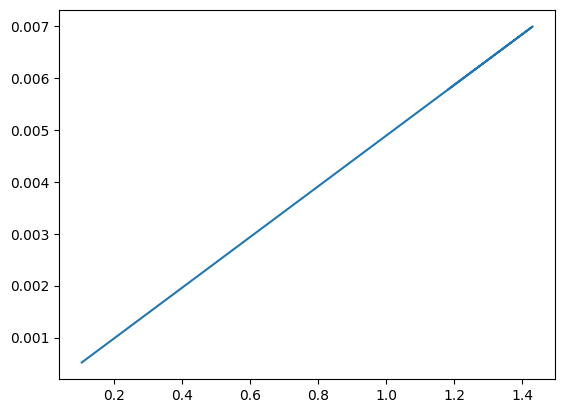

In [ ]:
import seaborn as sb
plt.plot(df1['Betas'],df1['Retornos CAPM']);

In [ ]:
#Fama-french
datos = pd.read_csv("datos.csv",sep=";")
factores = pd.concat([datos['Mkt-RF'],datos['SMB'],datos['HML']], axis=1)/100
factores.index = retornos1.index

In [ ]:
#CAT
X = factores
Y = retornos1
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     17.34
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.39e-08
Time:                        04:42:18   Log-Likelihood:                 79.430
No. Observations:                  60   AIC:                            -150.9
Df Residuals:                      56   BIC:                            -142.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.009      0.186      0.8

In [ ]:
fmCAT = (1.0160*rCAT)+(0.0191*rCAT)+(0.5270*rCAT)

In [ ]:
#GOLDMAN SACH
X = factores
Y = retornos2
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     49.40
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           9.59e-16
Time:                        04:42:21   Log-Likelihood:                 96.986
No. Observations:                  60   AIC:                            -186.0
Df Residuals:                      56   BIC:                            -177.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.006     -0.452      0.6

In [ ]:
fmGS = (1.3159*rGS)+(0.1396*rGS)+(0.4893*rGS)

In [ ]:
#INTEL CORP
X = factores
Y = retornos3
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     6.639
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           0.000647
Time:                        04:42:24   Log-Likelihood:                 73.879
No. Observations:                  60   AIC:                            -139.8
Df Residuals:                      56   BIC:                            -131.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0120      0.010     -1.261      0.2

In [ ]:
fmINTC = (0.7029*rINTC)+(0.2249*rINTC)+(0.1630*rINTC)

In [ ]:
#PROCTER
X = factores
Y = retornos4
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     6.895
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           0.000494
Time:                        04:42:28   Log-Likelihood:                 104.29
No. Observations:                  60   AIC:                            -200.6
Df Residuals:                      56   BIC:                            -192.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.006      1.195      0.2

In [ ]:
fmPG = (0.4391*rPG)+(-0.6358*rPG)+(0.0662*rPG)

In [ ]:
#SALESFORCE
X = factores
Y = retornos5
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit() #OLS es linregress
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     20.91
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           3.25e-09
Time:                        04:42:31   Log-Likelihood:                 80.535
No. Observations:                  60   AIC:                            -153.1
Df Residuals:                      56   BIC:                            -144.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0046      0.009     -0.541      0.5

In [ ]:
fmCRM = (1.1559*rCRM)+(-0.0786*rCRM)+(-0.5419*rCRM)
     

In [ ]:
Df2 = pd.DataFrame({'Fama-French':[fmCAT,fmGS,fmINTC,fmPG,fmCRM],
                    'CAPM':[bCAT, bGS, bINTC, bPG, bCRM]}) 
Df2
   

,Fama-French,CAPM
0,0.014125,0.005789
1,0.012960,0.006992
2,0.011574,0.004073
3,-0.001385,0.002228
4,0.002320,0.000519


2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).

a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:
tomar solo posiciones largas en el portafolio.

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo estándar o paramétrico.

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo de estimación histórica.

d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000
portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

e. ¿Se encuentran diferencias significativas entre el VaR de simulación y el VaR de
paramétrico?

Cargas las acciones elegidas 

In [ ]:
activos = ["GS","NKE","VZ","MSFT","MMM"]

In [ ]:
precios = yf.download(activos, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna() #Retornos de los activos

[*********************100%***********************]  5 of 5 completed


In [ ]:
ind=['^DJI']
indice= yf.download(ind, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
mu = pd.DataFrame(retornos.mean()) 
cov = pd.DataFrame(retornos.cov())
sigma = pd.DataFrame(retornos.std())

In [ ]:
n = len(mu)
x = cp.Variable(n)
objetive = cp.Minimize(cp.quad_form(x,cov)) 
constraints = [x @ mu == 1, x>=0] 
prob = cp.Problem(objetive,constraints)
prob.solve()
sharpe = round(pd.DataFrame(x.value/sum(x.value)),3)
sharpe.index=activos
sharpe.columns=['Pesos']
sharpe

,Pesos
GS,0.0
NKE,-0.0
VZ,1.0
MSFT,0.0
MMM,0.0


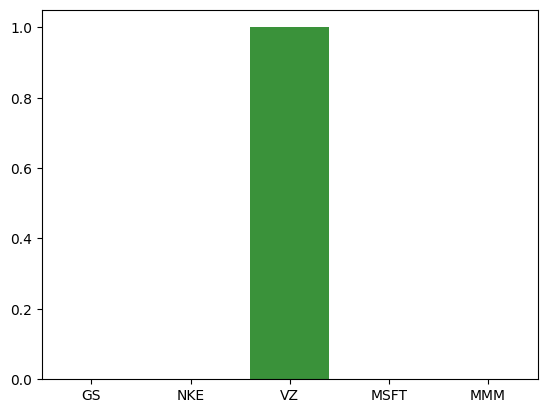

In [ ]:
sns.barplot(sharpe.T);

En este caso la accion de VZ ,se lleva la totalidad de los pesos respecto a las otras acciones .

In [ ]:
#Para hacer el VaR paramétrico primero debemos sacar el wpmvg para multplicarlo con los retornos
n=5
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [cp.sum(x) == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpmvg = x.value
wpmvg

array([5.38917337e-21, 8.56488021e-02, 2.98563332e-01, 4.51022882e-21,
       6.15787866e-01])

In [ ]:
#VaR con nivel de confianza del 95%
ret=retornos@wpmvg
rp=ret.mean()
sigmap=ret.std()
alpha=0.05
VaRp=rp-norm.ppf(1-alpha)*sigmap
VaRp

-0.06695290072150002

In [ ]:
#VaR con nivel de confianza del 99%
alpha2=0.01
VaRp2=rp-norm.ppf(1-alpha2)*sigmap
VaRp2

-0.0963582365044768

# Nueva sección

In [ ]:
np.percentile(ret,5)

-0.0793090966844935

In [ ]:
np.percentile(ret,1)

-0.09685526631951404

In [ ]:
#Montecarlo Simulación VaR
unif_dis=np.random.normal(rp,sigmap,10000)
simulacion=np.percentile(unif_dis,5)
simulacion

-0.06679829048907425

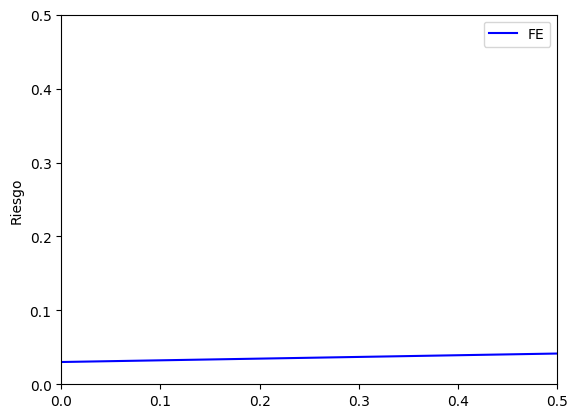

In [ ]:
#Frontera eficiente
plt.plot(unif_dis,'blue',label='FE')
plt.ylabel('Retorno Esperado')
plt.ylabel('Riesgo')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.legend()
plt.show();

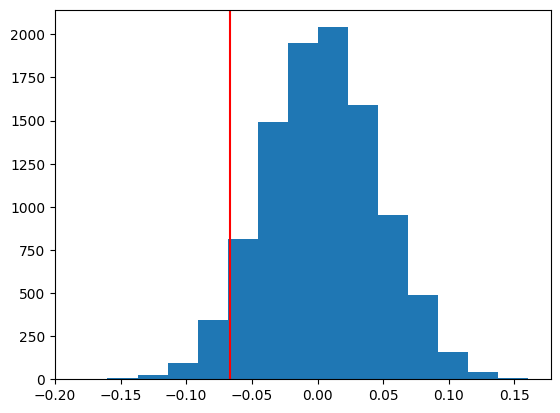

In [ ]:
plt.hist(unif_dis,bins='sturges')
plt.axvline(simulacion, color='r',label='VaR');

3. Los precios de activos riesgos en el mercado describen un proceso estocástico {St
}
t≥0

que satisface:

St = S0 exp{(μ– 1/2σ
2
)dt + σ dWt
}

Donde: μ es la tasa de retorno del activo, σ es su volatilidad y Wt es un proceso estándar de
Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de
tiempo t.

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente
gráficamente las primeras 20 trayectorias del proceso.
Nota: tome como S0 el precio de Dic-2022 y los parámetros estimados a partir de la muestra
de datos.

b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué puede
concluir de la forma de los histogramas?

c. Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [ ]:

activop = ["F"]
precio = yf.download(activop, start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retorno = np.log(precio/precio.shift()).dropna()
mup3 = retorno.mean()
sigmap3 = retorno.std()

[*********************100%***********************]  1 of 1 completed


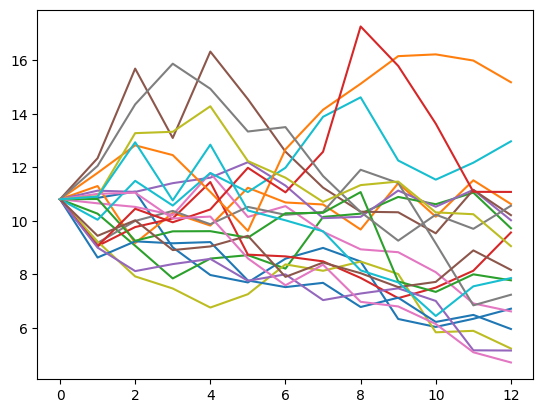

In [ ]:

def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S
T = 1 
mu = mup3*12
sigma = sigmap3*np.sqrt(12)
S0 = precio.tail(1)
NS = 20
M = 12 # Partición del año en meses
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St));


In [ ]:
#Punto B.

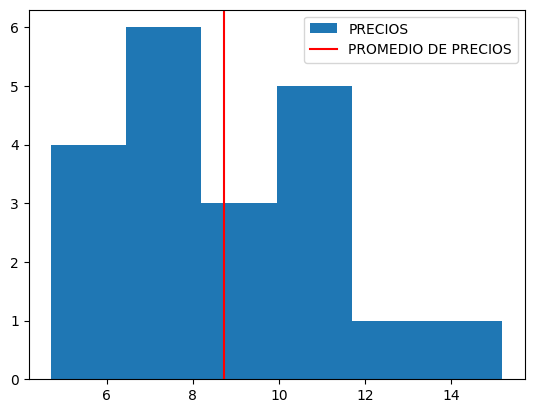

In [ ]:

plt.hist(St[:,-1], bins= "sturges", label='PRECIOS')
plt.axvline(St[:,-1].mean(), color='r', label='PROMEDIO DE PRECIOS')
plt.legend();
#Se puede observar que el precio promedio comparado al de precios es un poco lejado, pues el valor más grande de los precios es 14, mientras que el promedio se encuentra 
#aproximadamente en 9

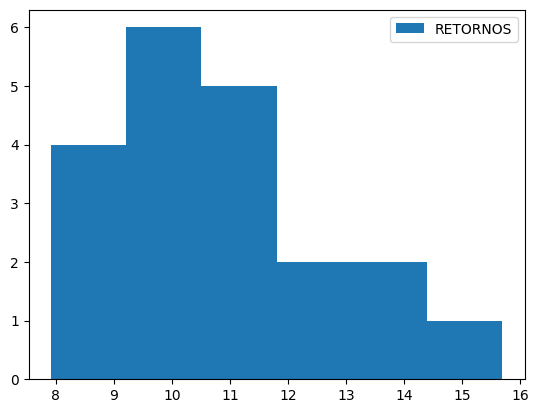

In [ ]:

plt.hist(St[:,2], bins= "sturges", label='RETORNOS')
plt.legend();
#Los retornos para el tiempo entre el 9-10 presenta mayor importancia y empieza a tener un comportamiento decreciente hasta el último año

In [ ]:
#Punto C

In [ ]:

S0*np.exp(mup3*T), St[:,-1].mean()

(Date
 2022-12-01    10.82632
 Name: Adj Close, dtype: float64,
 8.721549018932896)

In [ ]:
#Punto D

rands = np.random.normal(mup3,sigmap3, 100);
prop = norm.cdf(S0, loc=np.mean(rands), scale=np.std(rands))
prop

array([1.])

In [ ]:

St
St[:,-1]

array([ 6.71785199, 10.62740345,  9.72189354,  9.56368822, 10.02215633,
       10.21251495,  6.61821615,  7.23968669,  5.23047415, 12.96947581,
        5.95980053, 15.17619125,  7.77888663, 11.07955154,  5.15601443,
        8.16781182,  4.70953206, 10.56315388,  9.0550548 ,  7.86162216])


4. Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan
ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de
estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso Xt que satisface:
Xt+dt = Xt + (μ–Xt

)dt + σ(Wt+dt − Wt)

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles
trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ =
0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras
10 trayectorias del proceso.

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede
concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo
plazo?

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso
Ornstein-Uhlenbeck?

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa
corta de interés. Por ejemplo, si rt denota el valor de la tasa corte de interés en el mercado,
esta se puede modelar como:

rt+dt = rt + (μ– rt)dt + σ(Wt+dt − Wt)

Teniendo en cuenta los siguientes parámetros: r0 = 0. 03, μ = 0. 05, σ = 0. 15, T =
1, NS = 100, dt = T/m; simule 100 posibles valores de la tasa de corta en el instante
T = 1, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100 con
vencimiento en T. Presente gráficamente los resultados para las primeras 10 trayectorias del
proceso.


In [ ]:
#Punto A

In [ ]:

def PathsOU(X0,mu,sigma,T,NS,M):
    Z = np.random.normal(0.0,1.0,[NS,M])
    X = np.zeros([NS, M+1])
    X[:,0] = X0
    dt = T / M
    k=1
    std_dt = np.sqrt( sigma*2 /(2*k) * (1-np.exp(-2*k*dt)) )
    for t in range(0,M):
         X[:,t+1] = mu + np.exp(-k*dt)(X[:,t]-mu) + std_dt * Z[:,t]
    return X

In [ ]:

def or_uh(x0, mu, sigma, k, T, dt, ns):

    steps = int(T/dt)
    y = np.zeros((ns, steps))
    for i in range(ns):
        x = np.zeros(steps)
        x[0] = x0
        for j in range(1, steps):
            x[j] = x[j-1] + k*(mu-x[j-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        y[i] = x
    return y

In [ ]:
x0 = 1               
mu = 3                
sigma = 0.3          
k = 1                
T = 5                
dt = T/252           
ns = 100

In [ ]:

y = or_uh(x0, mu, sigma, k, T, dt, ns)

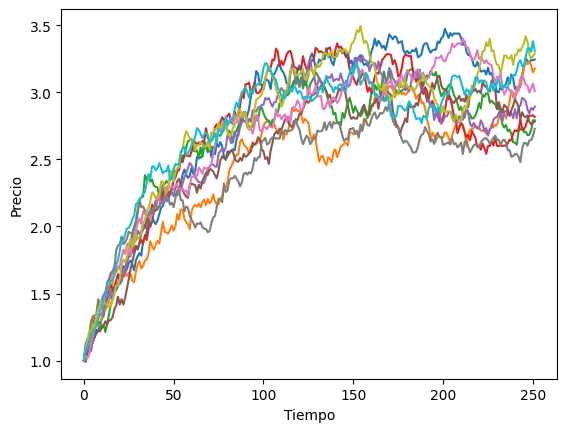

In [ ]:

plt.plot(np.transpose(y[:10]))
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.show()

In [ ]:
#Punto B. 

In [ ]:
#El valor esperado va a ser mucho mayor, es decir,su tendencia logaritmica es positiva
#Asimismo, su varianza va a crecer a lo largo del tiempo.

In [ ]:
#Punto C.

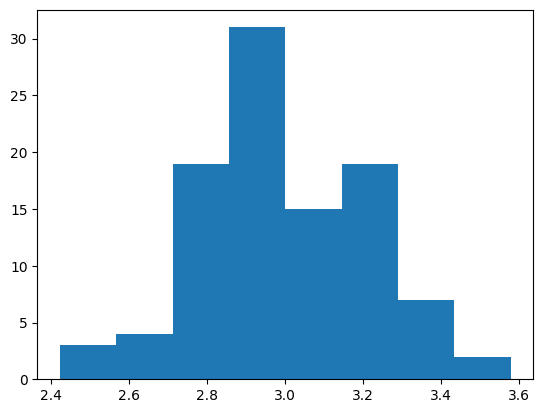

In [ ]:

p = y[:,-1]
plt.hist(p, bins='sturges')
plt.show;

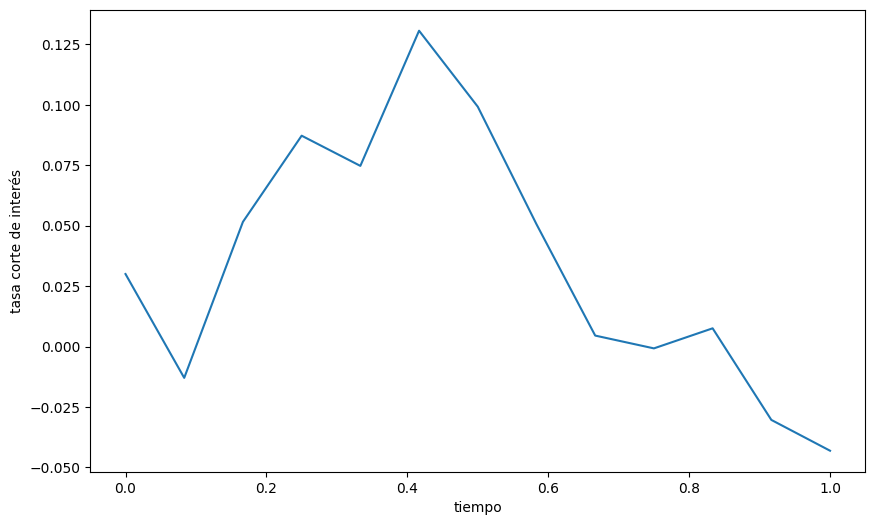

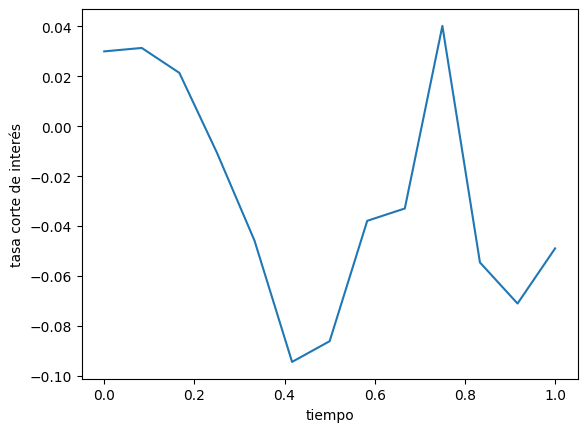

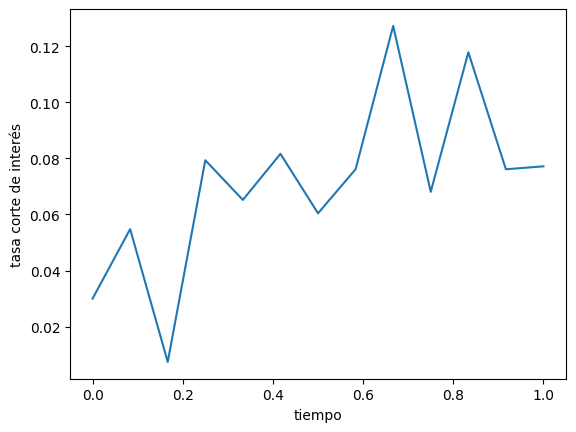

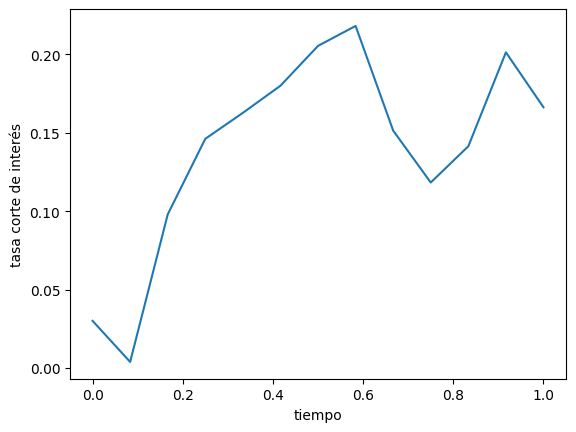

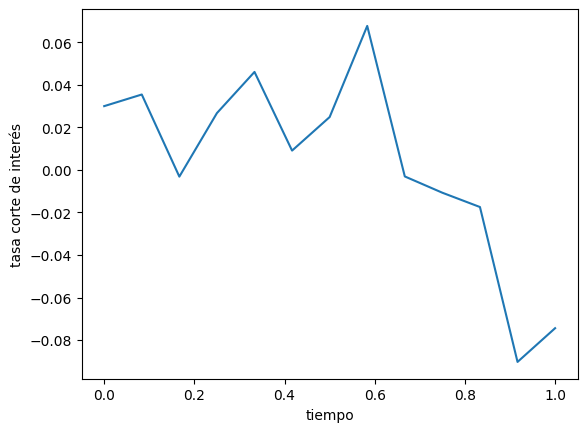

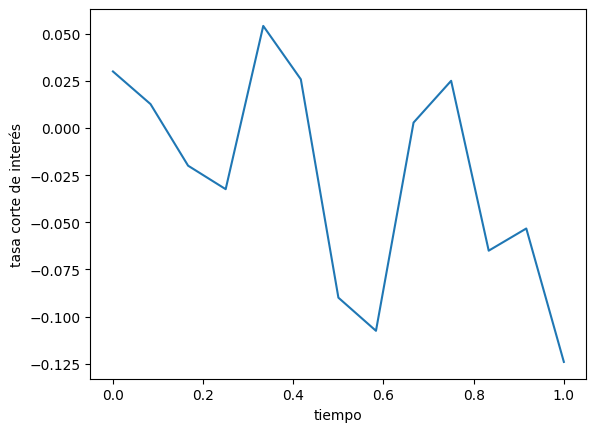

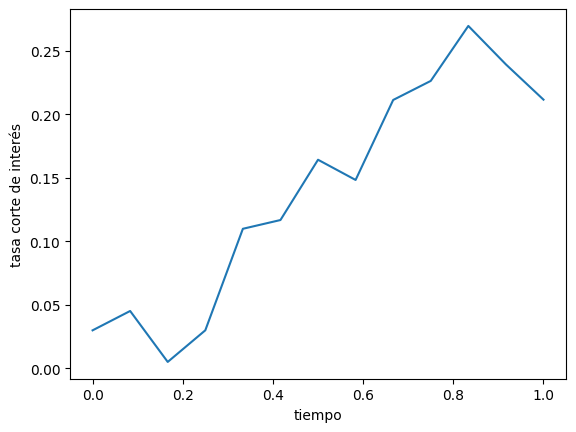

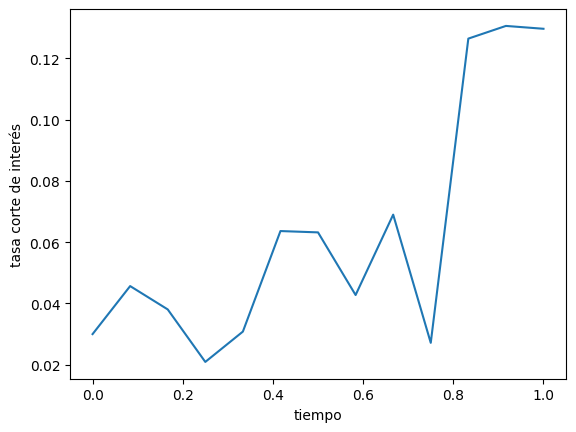

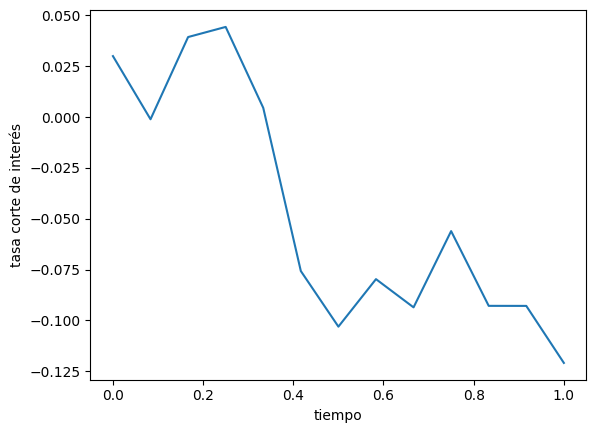

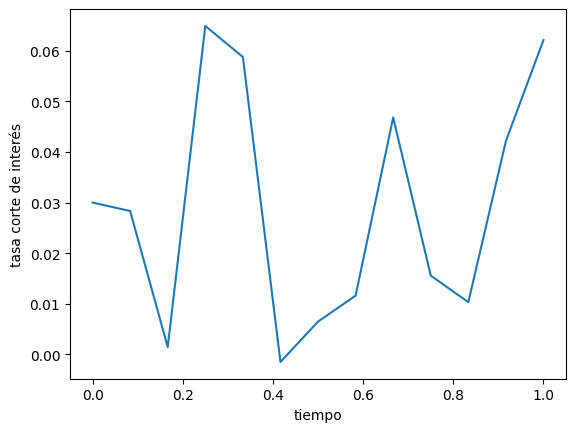

In [ ]:
#punto D
r0=0.03
mu=0.05
sigma=0.15
T=1
NS=100
m=12
dt=T/m

r=np.zeros((NS, m+1))
r[:,0]=r0
for i in range(NS):
  for j in range(m):
    r[i,j+1]=r[i,j]+(mu-r[i,j])*dt+sigma*np.random.normal()*np.sqrt(dt)
plt.figure(figsize=(10,6))
for i in range(10):
  plt.plot(np.linspace(0,T,m+1),r[i,:], label=f"trayectoria{i+1}")
  plt.xlabel("tiempo")
  plt.ylabel("tasa corte de interés")
  plt.show()

5. Escoja tres de los siguientes activos.
i. Gold futures (GC=F)
ii. Brent Oil futures (BZ=F)
iii. US Treasury Bill (^IRX)
iv. EURUSD currency (EURUSD=X)
v. GBPUSD currency (GBPUSD=X)
vi. Coffee futures (KC=F)
vii. Natural gas (NG=F)
viii. Cooper (HG=F)
Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con
periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año
2023.
 Para este ejercicio tenga en cuenta que las series pueden seguir un proceso
estocástico tipo MGB o de reversión a la media tipo OU.
La selección del proceso debe incorporar:
a. La gráfica de las series históricas de los precios
b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)
c. Los resultados de la simulación

[*********************100%***********************]  3 of 3 completed


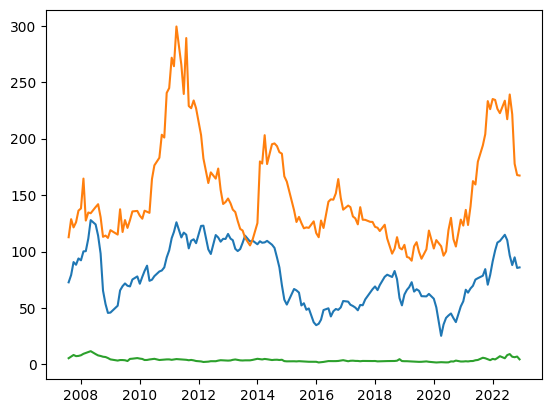

In [ ]:
#Punto A.La gráfica de las series históricas de los precios
#Activos: Brent Oil Futures (BZ=F), Coffee futures (KC=F) vii. Natural gas (NG=F)
p= yf.download(["BZ=F","KC=F","NG=F"], start="2005-01-01", end="2022-12-31",interval="1Mo")["Adj Close"].dropna()
r= np.log(p/p.shift()).dropna()
plt.plot(p);

In [ ]:
#Punto B.Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
pruebadf1= adfuller(p["BZ=F"])
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
 print("\t%s: %f" %(key,value))

ADF test: -2.497247
P-value: 0.116146
Citical values:
	1%: -3.472703
	5%: -2.880132
	10%: -2.576683


In [ ]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
pruebadf1= adfuller(p["KC=F"])
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
 print("\t%s: %f" %(key,value))

ADF test: -3.228038
P-value: 0.018418
Citical values:
	1%: -3.473830
	5%: -2.880623
	10%: -2.576945


In [ ]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
pruebadf1= adfuller(p["NG=F"])
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
 print("\t%s: %f" %(key,value))

ADF test: -2.781602
P-value: 0.060950
Citical values:
	1%: -3.475953
	5%: -2.881548
	10%: -2.577439


In [ ]:
#Punto C. Los resultados de la simulación
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M]) 
    S = np.zeros([NS, M+1])
    S[:,0] = S0 
    dt = T / M 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S


Text(0.5, 0, 'Tiempo')

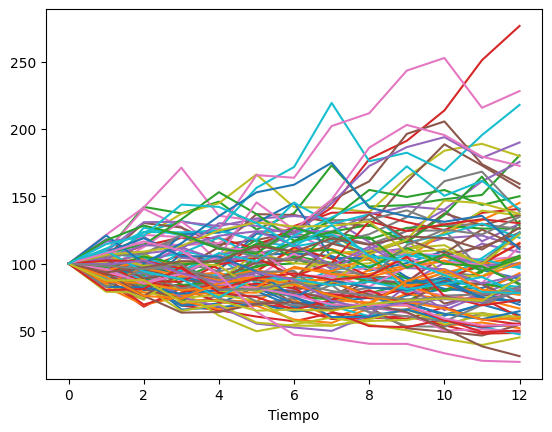

In [ ]:

# Brend Oil Futures
T = 1 
mu = r['BZ=F'].mean()
sigma = r['BZ=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

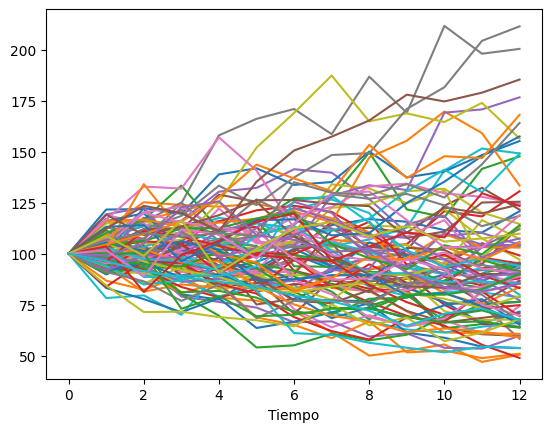

In [ ]:
#Coffee futures
T = 1 
mu = r["KC=F"].mean()
sigma = r["KC=F"].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

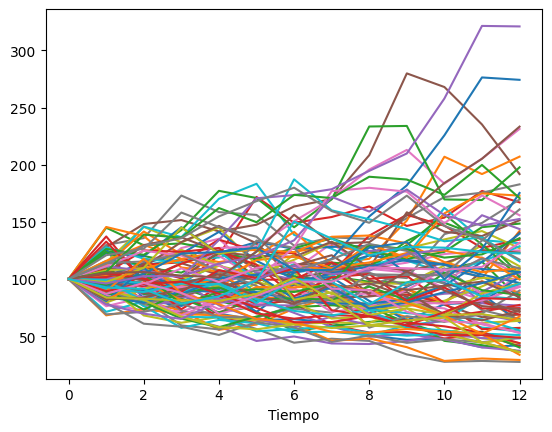

In [ ]:
#Natural gas
T = 1 
mu = r["NG=F"].mean()
sigma = r["NG=F"].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")